# Importando bibliotecas

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Semente

In [141]:
SEED = 42

# Objetivo

O objetivo teste modelo é predizer se, de acordo com as características da pessoa (renda per capita, faixa etária, frequência que vai a museus, entre outras), ela usaria nosso aplicativo ou não, levando em consideração do que a pessoa gosta e como é sua experiência ao visitar um museu, e o que nosso aplicativo oferece de funcionalidades extras com o premium.

#### Modelo

Um modelo criado neste contexto precisa levar então em consideração algumas coisas:

- Para que a versão premium do aplicativo seja atraente e possível para um usuário, é preciso que a pessoa seja o mais próximo possível do nosso perfil de público alvo:

    + <strong>Renda per capita:</strong> há uma maior chance de indivíduos com melhores oportunidades financeiras assinarem um plano pago de um aplicativo gratuito do que pessoas com dificuldades financeiras;
    + <strong>Tipo de arte que mais gosta:</strong> pinturas e fotografias têm mais a ver com nosso foco atualmente, indivíduos que se interessam mais por arte de rua ou arte digital, podem não achar o aplicativo interessante por abordar outro conteúdo;
    + <strong>Frequência que vai a museus:</strong> extremamente importante, pessoas que nunca vão ou vão raramente, é difícil instalarem um app sobre arte e de idas a museus, principalmente pagar por um que não usará com frequência;
    + <strong>Guia:</strong> informação valiosa em nosso contexto, uma das principais funcionalidades é justamente o guia de museu. Caso não utilize atualmente, improvável de usar no app, diminuindo assim a chance de instalarem;
    + <strong>Motivos:</strong> Leontis sendo uma plataforma de cultura e aprendizado, pessoas com interesse maior em aprender ou se inspirarem quando vão a museus, podem gostar mais do aplicativo;
    + <strong>Falta de informação:</strong> uma das perguntas mais importantes. Outra principal funcionalidade é o scanner, que serve para facilitar sua experiência no museu, quando sentir falta de informação da obra, escaneando-a o app te retorna mais informações. Porém isto se torna inútil caso o indivíduo se sinta satisfeito com o que é passado no museu;
    + <strong>Procurar informações:</strong> se a pessoa não tem costume de procurar essas informações, dificilmente usará o scanner mesmo não ficando satisfeito com o que é passado;
    + <strong>Achar informações:</strong> também, se atualmente ela pesquisa e encontra o que queria, é mais difícil de procurar um meio alternativo de busca, ainda mais pagar por serviços adicionais.

- Claro que o ideal é ter um modelo balanceado, ou seja, para cada classe ter uma boa performance de predição contendo pequenos erros para que não fique viciado. Porém, em nosso contexto, é mais importante acertar quem realmente usaria nosso aplicativo, do que errar dizendo que não é um possível usuário mesmo sendo. Ou seja, é melhor o modelo predizer pra menos o número de possíveis assinantes, do que pra mais, focando em definir que quem o modelo predisse que é um possível assinante, realmente seja, e predizendo que não era um possível assinante mesmo sendo, é menos relevante.

# Carregando base de dados e desconsiderando colunas desnecessárias

In [142]:
modelo = {}

In [143]:
treino = pd.read_excel(r'../bases/dados_de_treino_assinantes.xlsx')
teste = pd.read_excel(r'../bases/dados_gerais_usuarios_com_label.xlsx').drop(columns=['Unnamed: 0'])
display(treino.head())
display(teste.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Assinaria o plano premium?
0,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,Não
1,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,Não
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Sim
3,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Sim,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
4,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Livros,Não,Sim


,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,Não
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,Não


# Conhecendo os dados do treino

## Describe e características básicas

In [144]:
treino.describe()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Assinaria o plano premium?
count,33,33,33,33,33,33,33,33,33,33,33,26,23,23,33
unique,6,4,5,6,5,2,2,4,2,3,2,2,5,2,2
top,Entre 36 e 45 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim
freq,6,12,9,10,10,17,20,9,24,13,26,23,7,15,17


### Label

In [145]:
nome_coluna_label = 'Assinaria o plano premium?'
treino[nome_coluna_label]

0     Não
1     Não
2     Sim
3     Não
4     Sim
5     Sim
6     Não
7     Não
8     Sim
9     Não
10    Não
11    Sim
12    Não
13    Sim
14    Não
15    Sim
16    Não
17    Sim
18    Sim
19    Sim
20    Não
21    Sim
22    Não
23    Sim
24    Não
25    Não
26    Não
27    Sim
28    Sim
29    Não
30    Sim
31    Sim
32    Sim
Name: Assinaria o plano premium?, dtype: object

### Classes

In [146]:
treino[nome_coluna_label].value_counts()

Assinaria o plano premium?
Sim    17
Não    16
Name: count, dtype: int64

### Tamanho

In [147]:
print("Quantidade de linhas:", treino.shape[0])
print("Quantidade de colunas:", treino.shape[1])

print()
print("Classe 'Sim' pelo total:", round(treino.loc[treino[nome_coluna_label] == 'Sim'].shape[0]/treino.shape[0]*100, 2), "%")
print("Classe 'Não' pelo total:", round(treino.loc[treino[nome_coluna_label] == 'Não'].shape[0]/treino.shape[0]*100, 2), "%")

Quantidade de linhas: 33
Quantidade de colunas: 15

Classe 'Sim' pelo total: 51.52 %
Classe 'Não' pelo total: 48.48 %


## Por coluna

In [148]:
for i in treino:
    if i == nome_coluna_label:
        continue
    print('=' * 30, i, '=' * 30)
    display(pd.crosstab(treino[i], treino[nome_coluna_label]))
    print(treino[i].value_counts())
    print('\n')

============================== Em qual faixa etária você se encaixa? ==============================


Assinaria o plano premium?,Não,Sim
Em qual faixa etária você se encaixa?,,
60+ anos,1,2
Entre 18 e 24 anos,3,3
Entre 25 e 35 anos,3,3
Entre 36 e 45 anos,3,3
Entre 46 e 59 anos,3,3
Menos de 18 anos,3,3


Em qual faixa etária você se encaixa?
Entre 36 e 45 anos    6
Entre 46 e 59 anos    6
Menos de 18 anos      6
Entre 25 e 35 anos    6
Entre 18 e 24 anos    6
60+ anos              3
Name: count, dtype: int64


============================== Qual a renda per capita da sua casa? ==============================


Assinaria o plano premium?,Não,Sim
Qual a renda per capita da sua casa?,,
Classe A: superior a R$ 22 mil,6,3
"Classe B: entre R$ 7,1 mil e R$ 22 mil",2,7
"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",5,7
"Classes D/E: até R$ 2,9 mil",3,0


Qual a renda per capita da sua casa?
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    12
Classe A: superior a R$ 22 mil              9
Classe B: entre R$ 7,1 mil e R$ 22 mil      9
Classes D/E: até R$ 2,9 mil                 3
Name: count, dtype: int64


============================== Há quanto tempo você se interessa por arte? ==============================


Assinaria o plano premium?,Não,Sim
Há quanto tempo você se interessa por arte?,,
De 2 a 4 anos,2,2
De 5 a 9 anos,6,3
Estou iniciando agora,1,4
Há mais de 10 anos,3,6
Menos de 2 anos,4,2


Há quanto tempo você se interessa por arte?
Há mais de 10 anos       9
De 5 a 9 anos            9
Menos de 2 anos          6
Estou iniciando agora    5
De 2 a 4 anos            4
Name: count, dtype: int64


============================== Qual das opções de arte abaixo você mais gosta? ==============================


Assinaria o plano premium?,Não,Sim
Qual das opções de arte abaixo você mais gosta?,,
Arquitetura e Urbanismo,2,3
Arte de rua/grafite,4,1
Arte digital,1,2
Escultura,2,1
Fotografia,3,4
Pintura,4,6


Qual das opções de arte abaixo você mais gosta?
Pintura                    10
Fotografia                  7
Arte de rua/grafite         5
Arquitetura e Urbanismo     5
Escultura                   3
Arte digital                3
Name: count, dtype: int64


============================== Com que frequência você vai aos museus? ==============================


Assinaria o plano premium?,Não,Sim
Com que frequência você vai aos museus?,,
Frequentemente (máximo cinco vezes ao ano),2,4
Muito frequentemente (mais de cinco vezes ao ano),4,6
Nunca,4,0
Ocasionalmente (máximo três vezes ao ano),3,7
Raramente (uma vez ao ano),3,0


Com que frequência você vai aos museus?
Muito frequentemente (mais de cinco vezes ao ano)    10
Ocasionalmente (máximo três vezes ao ano)            10
Frequentemente (máximo cinco vezes ao ano)            6
Nunca                                                 4
Raramente (uma vez ao ano)                            3
Name: count, dtype: int64


============================== Você já participou de algum curso ou atividade relacionada à arte? ==============================


Assinaria o plano premium?,Não,Sim
Você já participou de algum curso ou atividade relacionada à arte?,,
Não,7,9
Sim,9,8


Você já participou de algum curso ou atividade relacionada à arte?
Sim    17
Não    16
Name: count, dtype: int64


============================== Você segue artístas ou páginas relacionadas à arte nas rede sociais? ==============================


Assinaria o plano premium?,Não,Sim
Você segue artístas ou páginas relacionadas à arte nas rede sociais?,,
Não,9,11
Sim,7,6


Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Não    20
Sim    13
Name: count, dtype: int64


============================== Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria. ==============================


Assinaria o plano premium?,Não,Sim
"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",,
Com um guia do próprio museu.,4,4
Planejo minha rota antes.,3,5
Sem um guia/planejamento para ver as obras.,6,2
"Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).",3,6


Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).    9
Sem um guia/planejamento para ver as obras.                                                         8
Com um guia do próprio museu.                                                                       8
Planejo minha rota antes.                                                                           8
Name: count, dtype: int64


============================== Você já usou um aplicativo de um museu ou relacionado à arte? ==============================


Assinaria o plano premium?,Não,Sim
Você já usou um aplicativo de um museu ou relacionado à arte?,,
Não,11,13
Sim,5,4


Você já usou um aplicativo de um museu ou relacionado à arte?
Não    24
Sim     9
Name: count, dtype: int64


============================== O que mais te atrai em visitar museus ou exposições de arte? ==============================


Assinaria o plano premium?,Não,Sim
O que mais te atrai em visitar museus ou exposições de arte?,,
Aprendizado,5,4
Inspiração,3,8
Lazer,8,5


O que mais te atrai em visitar museus ou exposições de arte?
Lazer          13
Inspiração     11
Aprendizado     9
Name: count, dtype: int64


============================== Você sente falta de mais informações sobre as obras nos museus? ==============================


Assinaria o plano premium?,Não,Sim
Você sente falta de mais informações sobre as obras nos museus?,,
"Não, acredito que o que tem no museu é o suficiente",5,2
"Sim, sinto falta de mais informações",11,15


Você sente falta de mais informações sobre as obras nos museus?
Sim, sinto falta de mais informações                   26
Não, acredito que o que tem no museu é o suficiente     7
Name: count, dtype: int64


============================== Você procura saber sobre essas informações faltantes? ==============================


Assinaria o plano premium?,Não,Sim
Você procura saber sobre essas informações faltantes?,,
"Não, apenas me conformo",2,1
"Sim, procuro",9,14


Você procura saber sobre essas informações faltantes?
Sim, procuro               23
Não, apenas me conformo     3
Name: count, dtype: int64


============================== De que forma você costuma buscar essas informações? ==============================


Assinaria o plano premium?,Não,Sim
De que forma você costuma buscar essas informações?,,
Blogs favoritos,0,3
"Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)",0,2
"Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)",5,2
Livros,1,5
Redes sociais,3,2


De que forma você costuma buscar essas informações?
Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)    7
Livros                                                                  6
Redes sociais                                                           5
Blogs favoritos                                                         3
Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)      2
Name: count, dtype: int64


============================== Você encontra o que precisa/esperava ao pesquisar? ==============================


Assinaria o plano premium?,Não,Sim
Você encontra o que precisa/esperava ao pesquisar?,,
Não,5,10
Sim,4,4


Você encontra o que precisa/esperava ao pesquisar?
Não    15
Sim     8
Name: count, dtype: int64




## Identificação de dados nulos e duplicados

In [149]:
# Dados nulos
treino.isnull().sum()

Em qual faixa etária você se encaixa?                                                                                              0
Qual a renda per capita da sua casa?                                                                                               0
Há quanto tempo você se interessa por arte?                                                                                        0
Qual das opções de arte abaixo você mais gosta?                                                                                    0
Com que frequência você vai aos museus?                                                                                            0
Você já participou de algum curso ou atividade relacionada à arte?                                                                 0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                               0
Como é sua experiência ao visitar um museu normalmente? Caso nunca te

In [150]:
# Dados duplicados
treino.duplicated().sum()

0

# Conhecendo os dados do teste

## Describe e características básicas

In [151]:
teste.describe()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
count,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288
unique,6,4,6,7,6,3,3,5,3,6,3,3,7,3,2
top,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações",Não sente falta de informações,Não procura essas informações,Não procura essas informações,Sim
freq,134,115,84,75,96,110,167,112,174,88,151,137,188,188,150


### Tamanho

In [152]:
print("Quantidade de linhas:", teste.shape[0])
print("Quantidade de colunas:", teste.shape[1])

Quantidade de linhas: 288
Quantidade de colunas: 15


### Colunas

In [153]:
for i in teste:
    print('\n=====', i, '=====')
    for j in sorted(teste[i].unique()):
        print(j)


===== Em qual faixa etária você se encaixa? =====
60+ anos
Entre 18 e 24 anos
Entre 25 e 35 anos
Entre 36 e 45 anos
Entre 46 e 59 anos
Menos de 18 anos

===== Qual a renda per capita da sua casa? =====
Classe A: superior a R$ 22 mil
Classe B: entre R$ 7,1 mil e R$ 22 mil
Classe C: entre R$ 2,9 mil e R$ 7,1 mil
Classes D/E: até R$ 2,9 mil

===== Há quanto tempo você se interessa por arte? =====
De 2 a 4 anos
De 5 a 9 anos
Estou iniciando agora
Há mais de 10 anos
Menos de 2 anos
Não me interesso

===== Qual das opções de arte abaixo você mais gosta? =====
Arquitetura e Urbanismo
Arte de rua/grafite
Arte digital
Escultura
Fotografia
Não se interessa por arte
Pintura

===== Com que frequência você vai aos museus? =====
Frequentemente (máximo cinco vezes ao ano)
Muito frequentemente (mais de cinco vezes ao ano)
Nunca
Não se interessa por arte
Ocasionalmente (máximo três vezes ao ano)
Raramente (uma vez ao ano)

===== Você já participou de algum curso ou atividade relacionada à arte? =====


## Identificação de dados nulos

In [154]:
# Dados nulos
teste.isnull().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

# Pré-processamento e seleção de variáveis

## Seleção/exclusão de variáveis

In [155]:
base_de_treino = treino.copy()

In [156]:
teste = teste.loc[teste['Usaria o aplicativo?'] == 'Sim']
teste = teste.drop(columns=['Usaria o aplicativo?'])
df_teste = teste.copy()
df_teste.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
5,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim
7,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim
8,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações
9,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Sim,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações
12,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Livros,Não


In [157]:
base_de_treino = base_de_treino.drop(columns=['Você já usou um aplicativo de um museu ou relacionado à arte?', 'De que forma você costuma buscar essas informações?'])
df_teste = df_teste.drop(columns=['Você já usou um aplicativo de um museu ou relacionado à arte?', 'De que forma você costuma buscar essas informações?'])
display(base_de_treino.head())
display(df_teste.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Assinaria o plano premium?
0,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim,Não
1,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim,Não
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,Sim
3,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,Não
4,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não,Sim


,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
5,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim
7,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim
8,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações
9,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
12,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não


### Atributo e variável de resposta

In [158]:
df_x, df_y = base_de_treino.drop(columns=[nome_coluna_label]), base_de_treino[nome_coluna_label]
display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim
1,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN
3,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN
4,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não


0    Não
1    Não
2    Sim
3    Não
4    Sim
Name: Assinaria o plano premium?, dtype: object

## Tratamento dos dados faltantes

In [159]:
df_x.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
df_x.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
df_x.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
df_x.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

df_x.isna().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

In [160]:
df_teste.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
df_teste.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
df_teste.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
df_teste.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

df_teste.isna().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

## Adequação/formatação dos dados

In [161]:
mapeamento_renda = {'Classes D/E: até R$ 2,9 mil': 2, 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil': 7,
'Classe B: entre R$ 7,1 mil e R$ 22 mil': 10, 'Classe A: superior a R$ 22 mil': 9} # Aplicando um peso maior para a Classe B visto acima que pessoas da Classe A, proporcionalmente possuem uma taxa menor de assinantes do que a Classe C
mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 10, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 4,'Arte de rua/grafite': 3}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 10,'Muito frequentemente (mais de cinco vezes ao ano)': 9,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 3,'Nunca': 1}
mapeamento_guia = {'Não se interessa por arte': 0, 'Planejo minha rota antes.': 10, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 8, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'Não se interessa por arte': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 7, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'Não vai a museus': 0, 'Sim, sinto falta de mais informações': 10, 'Não, acredito que o que tem no museu é o suficiente': 2}
mapeamento_procurar_info = {'Não sente falta de informações': 0, 'Sim, procuro': 9, 'Não, apenas me conformo': 3}
mapeamento_achar_info = {'Não procura essas informações': 0, 'Sim': 3, 'Não': 9}
mapeamento = {'Qual a renda per capita da sua casa?': mapeamento_renda, 'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': mapeamento_guia, 'O que mais te atrai em visitar museus ou exposições de arte?': mapeamento_motivo, 'Você sente falta de mais informações sobre as obras nos museus?': mapeamento_falta_info, 'Você procura saber sobre essas informações faltantes?': mapeamento_procurar_info, 'Você encontra o que precisa/esperava ao pesquisar?': mapeamento_achar_info}

modelo['aplicacao_de_pesos'] = mapeamento

label_encoder = {}

for i in df_x:
    if df_x[i].dtype == object:
        if i in mapeamento.keys():
            df_x[i] = df_x[i].map(mapeamento[i])
        else:
            dicio_unicos = {}
            unicos = list(df_x[i].unique())
            for k, v in enumerate(unicos):
                dicio_unicos[v] = k
            df_x[i] = df_x[i].map(dicio_unicos)
            label_encoder[i] = dicio_unicos

modelo['numerico'] = label_encoder

mapeamento_assinante = {'Sim': 1, 'Não': 0}
df_y = df_y.map(mapeamento_assinante)

modelo['label_numerico'] = mapeamento_assinante

display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,0,2,0,3,10,0,0,2,10,10,9,3
1,1,7,1,6,3,1,0,2,10,10,9,3
2,2,7,0,10,9,0,0,9,9,10,3,0
3,1,9,2,8,10,1,0,8,10,2,0,0
4,2,7,3,10,9,1,0,10,9,10,9,9


0    0
1    0
2    1
3    0
4    1
Name: Assinaria o plano premium?, dtype: int64

In [162]:
for i in df_teste:
    if df_teste[i].dtype == object:
        if i in mapeamento.keys():
            df_teste[i] = df_teste[i].map(mapeamento[i])
        else:
            df_teste[i] = df_teste[i].map(label_encoder[i])

display(df_teste.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
5,0,2,0,3,10,0,0,2,10,10,9,3
7,1,7,1,6,3,1,0,2,10,10,9,3
8,2,7,0,10,9,0,0,9,9,10,3,0
9,1,9,2,8,10,1,0,8,10,2,0,0
12,2,7,3,10,9,1,0,10,9,10,9,9


## Normalização

In [163]:
from sklearn.preprocessing import StandardScaler

colunas = df_x.columns

ss = StandardScaler()
df_x = ss.fit_transform(df_x)
df_x = pd.DataFrame(df_x, columns=colunas)
display(df_x.head())

modelo['colunas'] = df_x.columns
modelo['StandardScaler'] = ss

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,-1.374143,-2.644812,-1.399318,-1.469805,0.886832,-0.970143,-0.806226,-1.721987,1.204208,0.518875,0.646162,-0.457629
1,-0.792775,-0.406894,-0.603154,-0.324052,-1.467860,1.030776,-0.806226,-1.721987,1.204208,0.518875,0.646162,-0.457629
2,-0.211407,-0.406894,-1.399318,1.203620,0.550448,-0.970143,-0.806226,0.551036,0.409431,0.518875,-0.933346,-1.212716
3,-0.792775,0.488273,0.193009,0.439784,0.886832,1.030776,-0.806226,0.226318,1.204208,-1.927248,-1.723100,-1.212716
4,-0.211407,-0.406894,0.989173,1.203620,0.550448,1.030776,-0.806226,0.875754,0.409431,0.518875,0.646162,1.052546


In [164]:
df_teste = ss.transform(df_teste)
df_teste = pd.DataFrame(df_teste, columns=colunas)
df_teste.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,-1.374143,-2.644812,-1.399318,-1.469805,0.886832,-0.970143,-0.806226,-1.721987,1.204208,0.518875,0.646162,-0.457629
1,-0.792775,-0.406894,-0.603154,-0.324052,-1.467860,1.030776,-0.806226,-1.721987,1.204208,0.518875,0.646162,-0.457629
2,-0.211407,-0.406894,-1.399318,1.203620,0.550448,-0.970143,-0.806226,0.551036,0.409431,0.518875,-0.933346,-1.212716
3,-0.792775,0.488273,0.193009,0.439784,0.886832,1.030776,-0.806226,0.226318,1.204208,-1.927248,-1.723100,-1.212716
4,-0.211407,-0.406894,0.989173,1.203620,0.550448,1.030776,-0.806226,0.875754,0.409431,0.518875,0.646162,1.052546


## Redução de dimensionalidade

In [165]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=SEED)
df_x = pca.fit_transform(df_x)
colunas_pca = ['PCA1', 'PCA2']
df_x = pd.DataFrame(df_x, columns=colunas_pca)
df_x.head()

modelo['PCA'] = pca

In [166]:
df_teste = pca.transform(df_teste)
colunas_pca = ['PCA1', 'PCA2']
df_teste = pd.DataFrame(df_teste, columns=colunas_pca)
df_teste.head()

,PCA1,PCA2
0,0.642059,-0.196703
1,0.348999,-1.025257
2,-1.083484,0.989353
3,-2.770336,1.202839
4,0.920388,1.631757


# Escolha e aplicação do modelo de Machine Learning

### Algoritmo de machine learning

Foi escolhido o algoritmo de KNN, uma vez que o modelo será treinado inicialmente por um pequeno conjunto de dados criados, atribuindo a label de acordo com as características que achamos que mais se assemelham a assinantes do aplicativo, criando assim apenas alguns pontos no plano cartesiano, já com variável de repsosta. Depois, predizer e atribuir resultado a base do forms, instanciando e treinando um novo modelo com ambas as bases, encrementando então o modelo anterior. O que antes eram apenas alguns pontos, agora existem pontos como "centros" e dados em torno com variações para evitar o overfitting. Esse foi o criério de escolha decisivo de qual algoritmo usaríamos para predizer possíveis usuários.

## Treinando modelo incial e atribuindo labels aos dados do forms

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(df_x, df_y)
predict = knn.predict(df_teste)
teste[nome_coluna_label] = predict
modelo['label_categorico'] = {0: 'Não', 1: 'Sim'}
teste[nome_coluna_label] = teste[nome_coluna_label].map(modelo['label_categorico'])
print(predict)

[1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1
 1 0]


In [168]:
dados_geral = pd.concat([treino, teste], axis=0, join='inner', ignore_index=True)
dados_geral.to_excel(r'../bases/dados_gerais_assinantes_com_label.xlsx')
dados_geral.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Assinaria o plano premium?
0,Entre 36 e 45 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Frequentemente (máximo cinco vezes ao ano),Sim,Não,Sem um guia/planejamento para ver as obras.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,Não
1,Entre 46 e 59 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Escultura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,Não
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Sim
3,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Fotografia,Frequentemente (máximo cinco vezes ao ano),Não,Não,Com um guia do próprio museu.,Sim,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
4,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Não,Planejo minha rota antes.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Livros,Não,Sim


## Dividindo dados gerais em treino e teste

In [169]:
x, y = df_teste.copy(), predict.copy()
display(x)
display(y)

,PCA1,PCA2
0,0.642059,-0.196703
1,0.348999,-1.025257
2,-1.083484,0.989353
3,-2.770336,1.202839
4,0.920388,1.631757
...,...,...
145,-2.266236,0.947615
146,1.313090,-1.259493
147,1.074378,-0.978796
148,1.600793,-1.067931


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [170]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20, random_state=SEED)

display(x_treino)
display(y_treino)
display(x_teste)
display(y_teste)

,PCA1,PCA2
22,-1.706194,-0.056719
15,1.027530,-0.111094
65,0.682506,0.152979
11,1.129357,-0.272624
42,1.569614,1.233250
...,...,...
71,-0.192049,-0.945367
106,-0.873577,0.553122
14,-2.994726,-0.383949
92,0.702179,-0.798479


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

,PCA1,PCA2
73,1.274570,1.389254
18,-0.787986,-0.498542
118,1.321524,-2.035008
78,1.567687,-0.372631
76,-0.858427,-2.114203
31,-0.720779,-0.087365
64,-0.531965,-0.731702
141,0.962273,-1.281702
68,-2.056574,-3.041960
82,2.255947,0.381337


array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_treino, y_treino)
predict = knn.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.76      1.00      0.86        16

    accuracy                           0.83        30
   macro avg       0.88      0.82      0.82        30
weighted avg       0.87      0.83      0.83        30



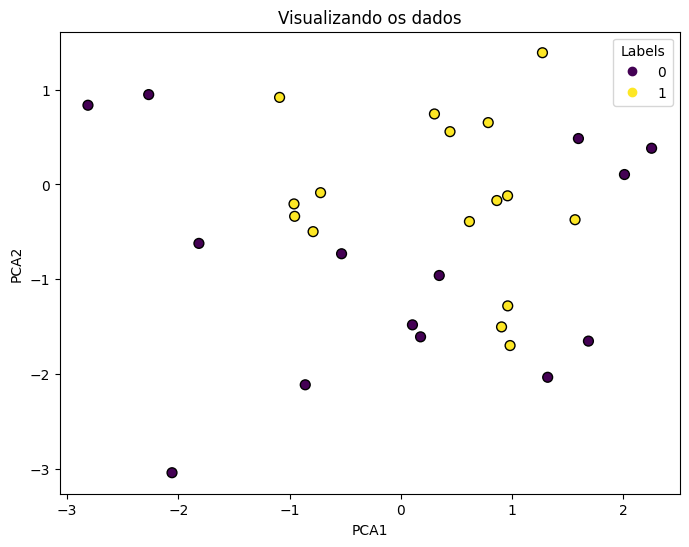

In [172]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_teste['PCA1'], x_teste['PCA2'], c=y_teste, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

## Treinando com todos os dados do forms
### E testando com os dados criados

Como os dados criados já estão com um certo viés de que é um possível assinante ou não, usar ele como teste, é o que faz mais sentido, estaríamos aplicando o modelo em um contexto mais real. Por isso iremos prosseguir com esta divisão:
- Dados do forms que acabamos de atribuir uma variável de resposta como <strong>treino</strong>
- Dados criados com labels alocadas de forma manual, de acordo com que acredito ser características de possíveis assinantes como <strong>teste</strong>

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

K = 5

smote = SMOTE(random_state=SEED)
x_refeito, y_refeito = smote.fit_resample(x, y)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_refeito, y_refeito)
predict = knn.predict(df_x)
print("Acurácia:", round(accuracy_score(df_y, predict) * 100, 2), "%")

Acurácia: 78.79 %


In [174]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_neighbors': list(range(2, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(15, 46))
}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='accuracy')

grid.fit(x_refeito, y_refeito)

print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor acurácia:", round(grid.best_score_ * 100, 2), "%")

parametros = grid.best_params_
melhor_knn = grid.best_estimator_
predict = melhor_knn.predict(df_x)
print("Acurácia:", round(accuracy_score(df_y, predict) * 100, 2), "%")

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 10, 'weights': 'distance'}
Melhor acurácia: 92.78 %
Acurácia: 69.7 %


Apesar da acurácia melhorar bastante ao aplicar o GridSearchCV, quando testamos um modelo com os melhores parâmetros com os dados de teste, a performance é inferior do que não alterando nenhum hiperparâmetro

In [175]:
melhor_acuracia = 0
melhor_seed = 0
for i in range(1, 1001):
    K = 5

    smote = SMOTE(random_state=i)
    x_refeito, y_refeito = smote.fit_resample(x, y)

    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_refeito, y_refeito)
    predict = knn.predict(df_x)
    if accuracy_score(df_y, predict) > melhor_acuracia:
        print("SEED:", i)
        melhor_acuracia = accuracy_score(df_y, predict)
        melhor_seed = i
        print("Acurácia:", round(accuracy_score(df_y, predict) * 100, 2), "%")

SEED: 1
Acurácia: 81.82 %


In [176]:
smote = SMOTE(random_state=1)
x_refeito, y_refeito = smote.fit_resample(x, y)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_refeito, y_refeito)
predict = knn.predict(df_x)
print("Acurácia:", round(accuracy_score(df_y, predict) * 100, 2), "%")

modelo['modelo'] = knn

Acurácia: 81.82 %


# Medição dos resultados

In [177]:
print(classification_report(df_y, predict))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.79      0.88      0.83        17

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33



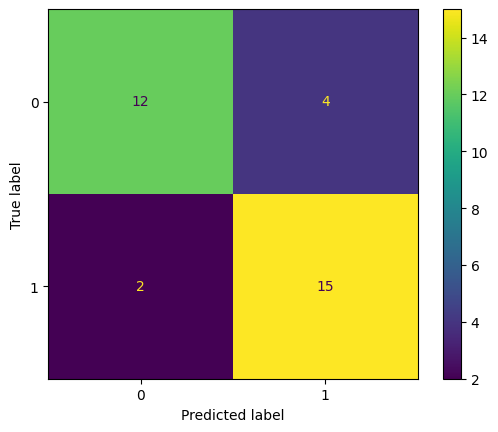

In [178]:
ConfusionMatrixDisplay(confusion_matrix(df_y, predict)).plot()

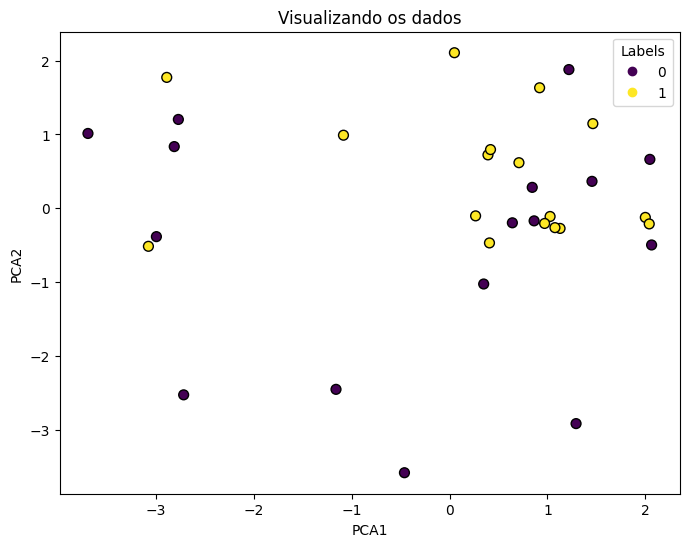

In [180]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_x['PCA1'], df_x['PCA2'], c=df_y, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

# Conclusão

Seguindo a mesma linha de treinamento do modelo de predição de possíveis usuários, este é o passo a passo de como o modelo final foi treinado:
- Treinar um modelo de KNN com os 33 dados criados;
- Predizer e atribuir label aos dados coletados do forms (link disponibilizado via Outlook em agosto de 2024), dados nos quais estavam sendo usados para montar clusters e atribuir uma label com o modelo não supervisionado;
- Após a criação da variável resposta, um novo modelo é instanciado e treinado com todos os dados do forms, agora com label;
- Damos predict no teste (base com dados criados) retornando assim uma boa acurácia.

# Exportação

In [179]:
import pickle

with open('../possiveis_assinantes/possiveis_assinantes.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)